In [1]:
# importing the library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from warnings import filterwarnings
filterwarnings("ignore")
%matplotlib inline

# Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis)

In [2]:
data_df = pd.read_csv(r'C:\Users\ACER\Downloads\DSBA\Data Mining\Project\bank_marketing_part1_Data.csv')

In [3]:
data_df.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003


In [4]:
data_df.shape

(210, 7)

In [5]:
data_df.dtypes

spending                        float64
advance_payments                float64
probability_of_full_payment     float64
current_balance                 float64
credit_limit                    float64
min_payment_amt                 float64
max_spent_in_single_shopping    float64
dtype: object

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [7]:
data_df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [8]:
data_df.duplicated().sum()

0

In [9]:
data_df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

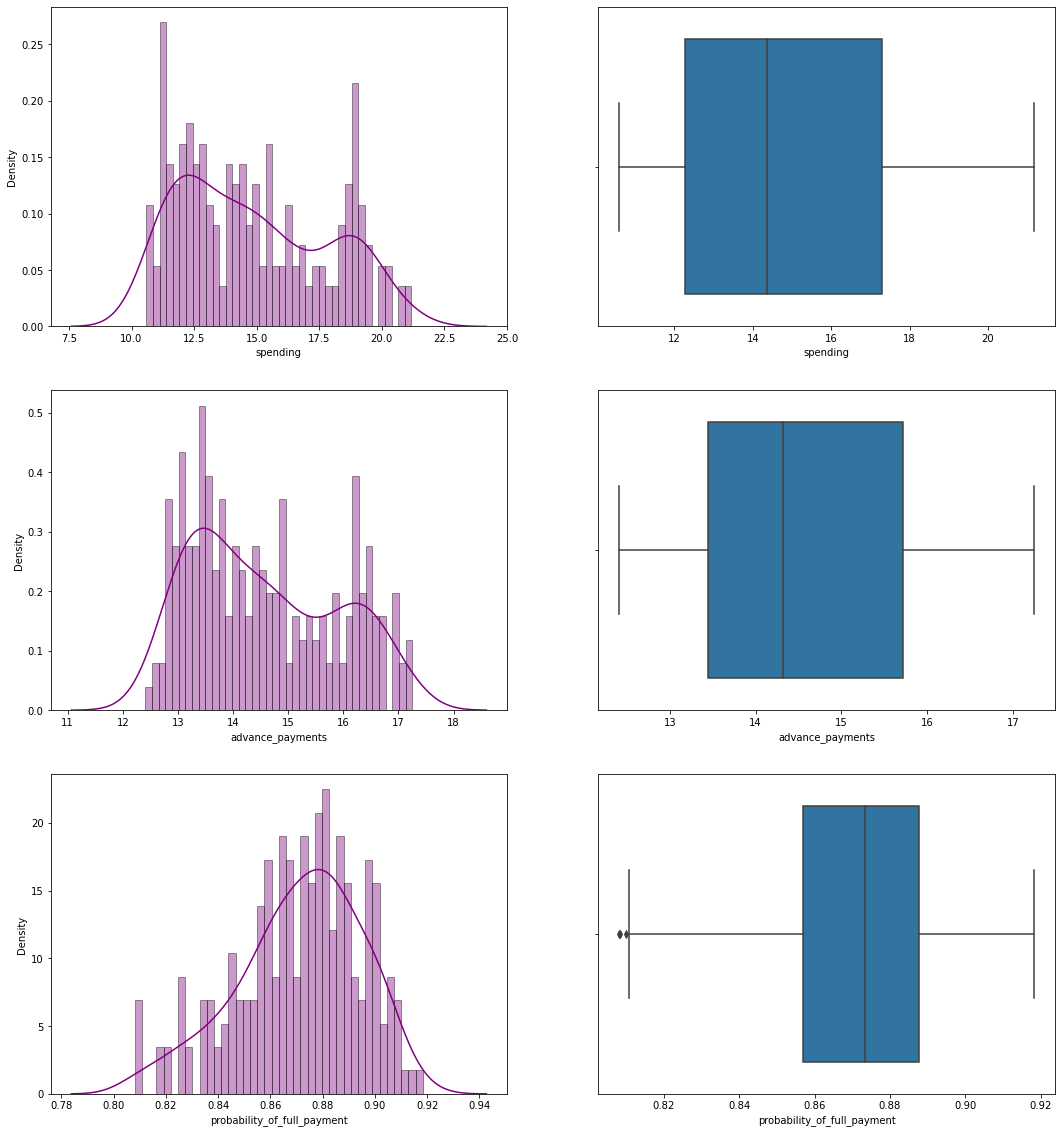

In [10]:
fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize = (18,20))
sns.distplot(data_df['spending'], bins = 40, hist_kws= dict(ec = 'black'), ax = axs[0][0],color= 'purple');
sns.distplot(data_df['advance_payments'], bins = 40, hist_kws= dict(ec = 'black'), ax = axs[1][0],color= 'purple');
sns.distplot(data_df['probability_of_full_payment'], bins = 40, hist_kws= dict(ec ='black'), ax = axs[2][0],color= 'purple');

sns.boxplot(data_df['spending'], ax = axs[0][1]);
sns.boxplot(data_df['advance_payments'], ax = axs[1][1]);
sns.boxplot(data_df['probability_of_full_payment'], ax = axs[2][1]);

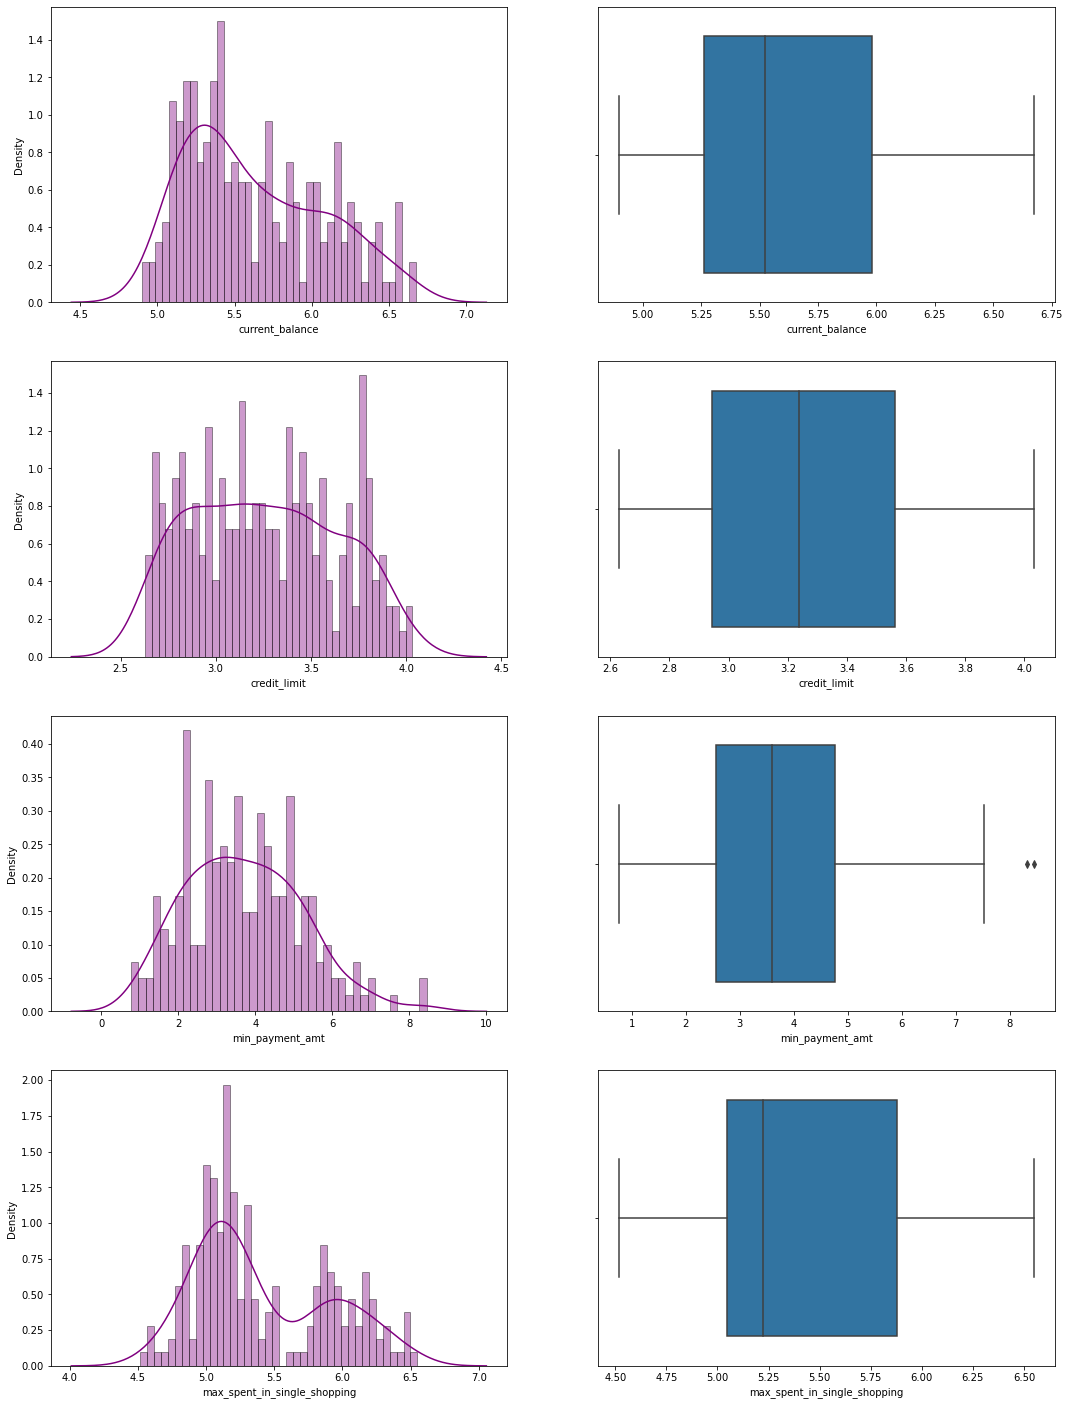

In [11]:
fig, axs = plt.subplots(nrows = 4, ncols = 2, figsize = (18,25))
sns.distplot(data_df['current_balance'], bins = 40, hist_kws= dict(ec = 'black'), ax= axs[0][0], color= 'purple');
sns.distplot(data_df['credit_limit'], bins = 40, hist_kws= dict(ec = 'black'), ax =axs[1][0], color= 'purple');
sns.distplot(data_df['min_payment_amt'], bins = 40, hist_kws= dict(ec = 'black'), ax= axs[2][0], color = 'purple');
sns.distplot(data_df['max_spent_in_single_shopping'], bins = 40, hist_kws= dict(ec ='black'), ax = axs[3][0], color= 'purple');

sns.boxplot(data_df['current_balance'], ax = axs[0][1]);
sns.boxplot(data_df['credit_limit'], ax = axs[1][1]);
sns.boxplot(data_df['min_payment_amt'], ax = axs[2][1]);
sns.boxplot(data_df['max_spent_in_single_shopping'], ax = axs[3][1]);

In [12]:
for columns in data_df.columns:
    print('Skewness of {} is'.format(columns), round(data_df[columns].skew(),2))

Skewness of spending is 0.4
Skewness of advance_payments is 0.39
Skewness of probability_of_full_payment is -0.54
Skewness of current_balance is 0.53
Skewness of credit_limit is 0.13
Skewness of min_payment_amt is 0.4
Skewness of max_spent_in_single_shopping is 0.56


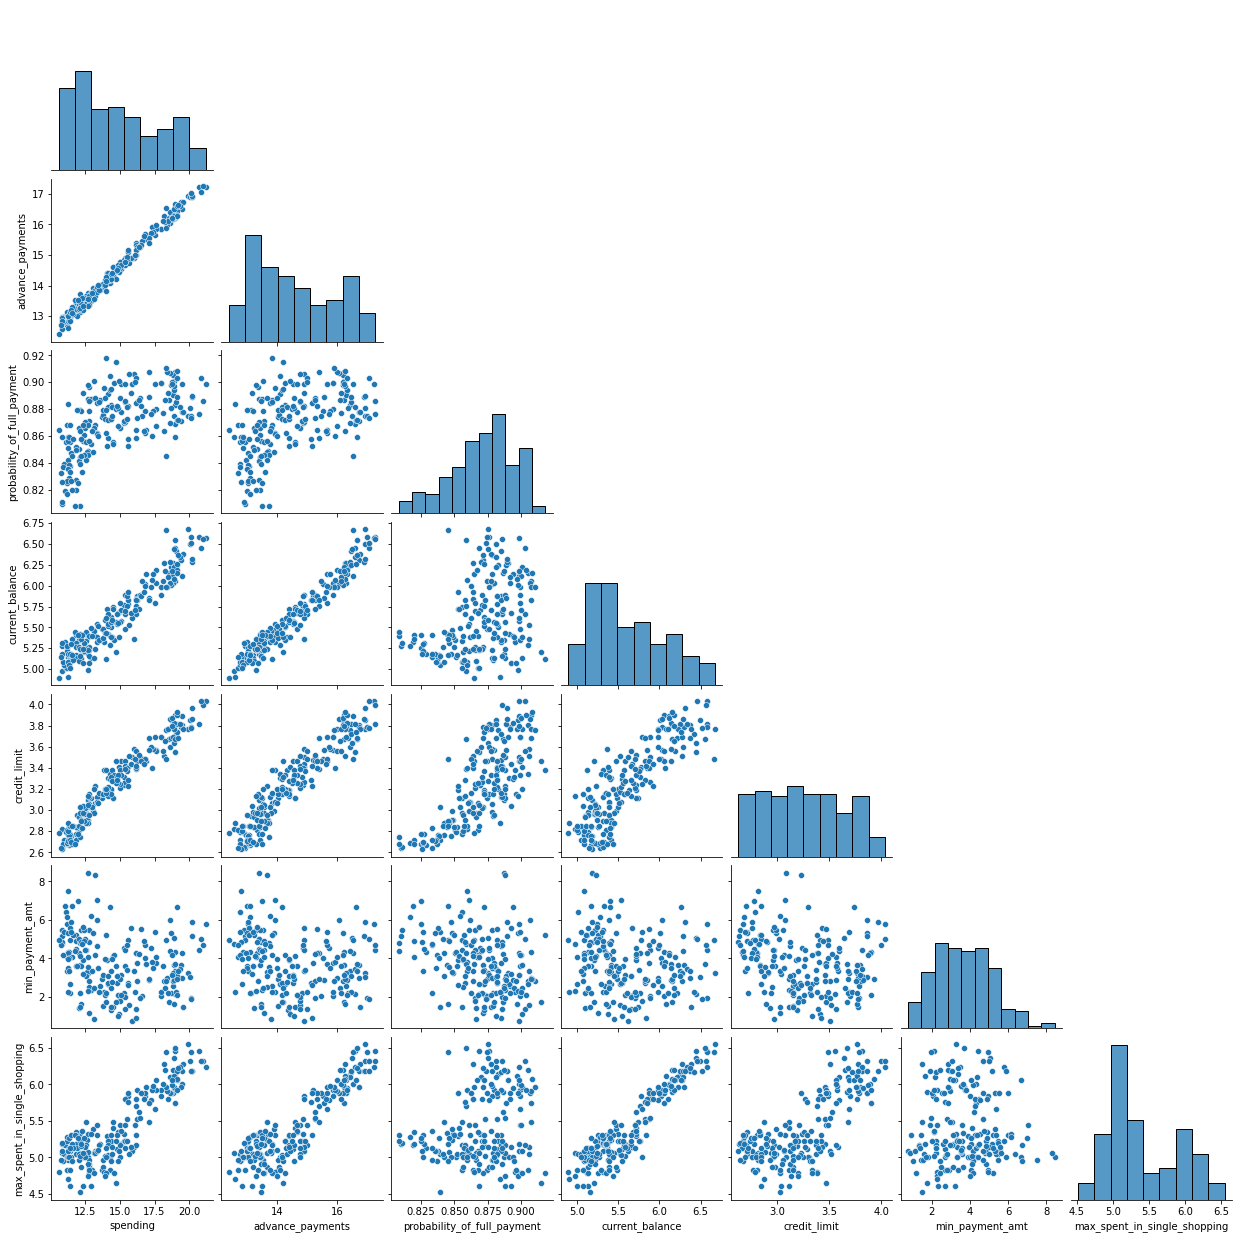

In [13]:
sns.pairplot(data_df, corner=True);

In [14]:
corr = data_df.corr()
corr

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


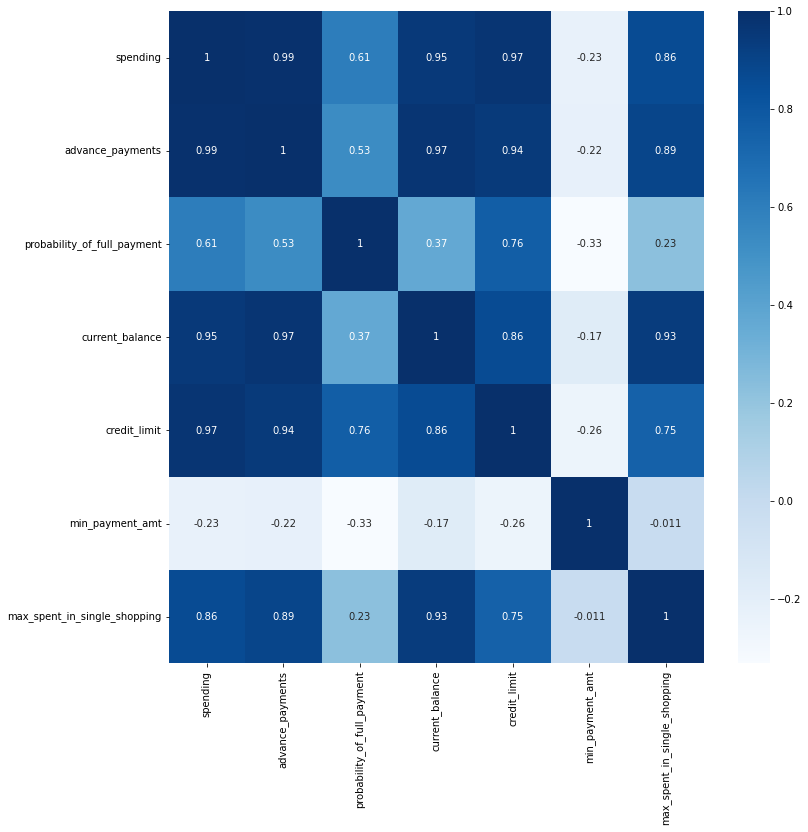

In [15]:
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, cmap='Blues');
plt.show();

1.2 Do you think scaling is necessary for clustering in this case? Justify

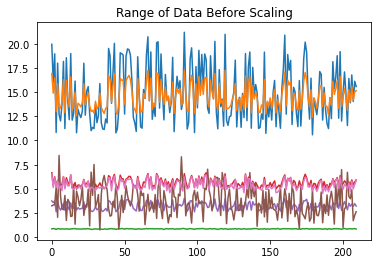

In [16]:
plt.title('Range of Data Before Scaling')
plt.plot(data_df);

In [17]:
data_df.var()

spending                        8.466351
advance_payments                1.705528
probability_of_full_payment     0.000558
current_balance                 0.196305
credit_limit                    0.142668
min_payment_amt                 2.260684
max_spent_in_single_shopping    0.241553
dtype: float64

In [18]:
sc = StandardScaler()
scaled_df = sc.fit_transform(data_df)
scaled_df = pd.DataFrame(scaled_df, index=data_df.index, columns=data_df.columns)
scaled_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


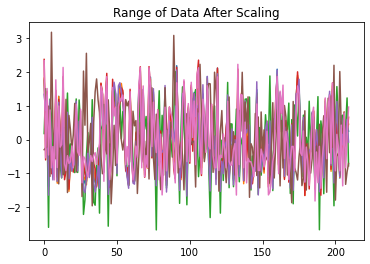

In [19]:
plt.title('Range of Data After Scaling')
plt.plot(scaled_df);

1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [20]:
wardlink = linkage(scaled_df, method = 'ward')

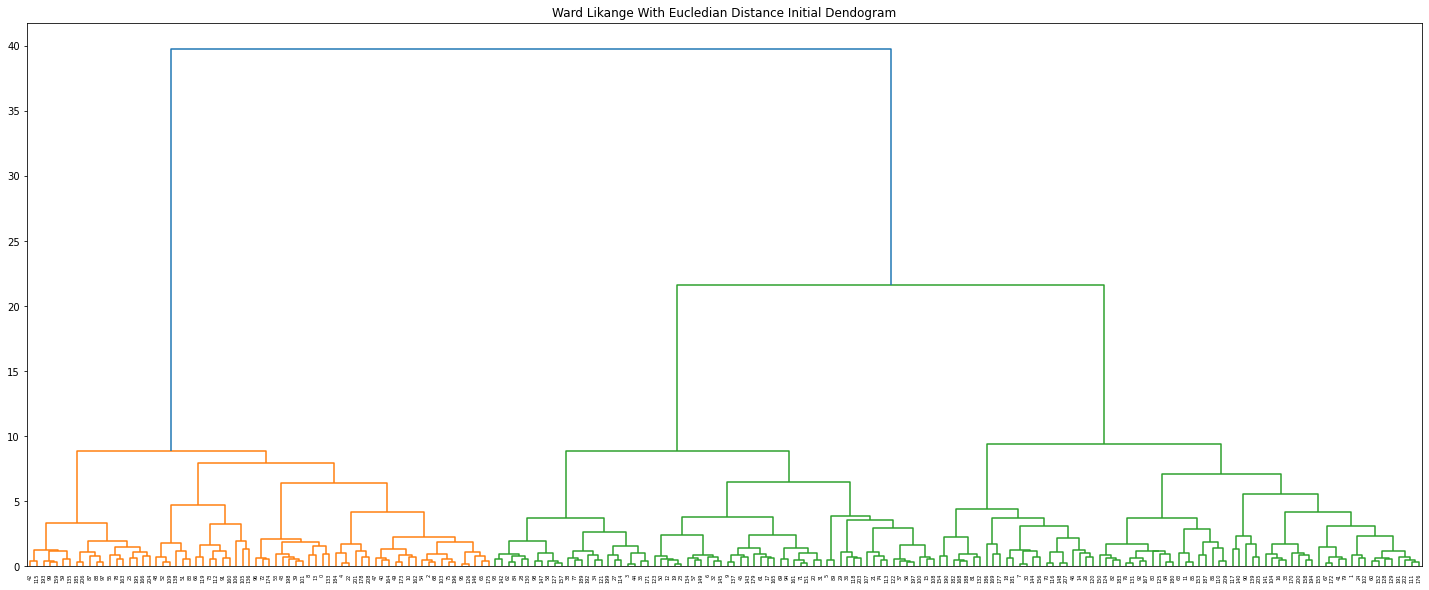

In [21]:
plt.figure(figsize=(25,10))
plt.title('Ward Likange With Eucledian Distance Initial Dendogram')
dend = dendrogram(wardlink)

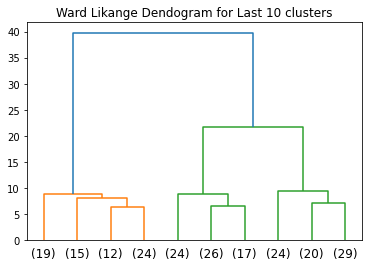

In [22]:
plt.title('Ward Likange Dendogram for Last 10 clusters')
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

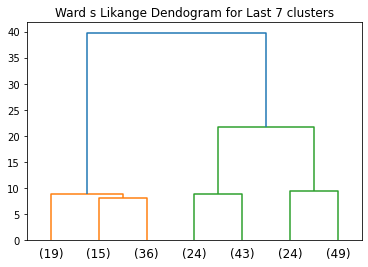

In [23]:
plt.title('Ward s Likange Dendogram for Last 7 clusters')
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 7,
                 )

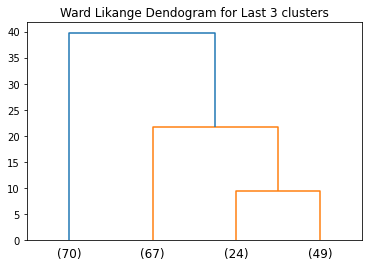

In [24]:
plt.title('Ward Likange Dendogram for Last 3 clusters')
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 4,
                 )

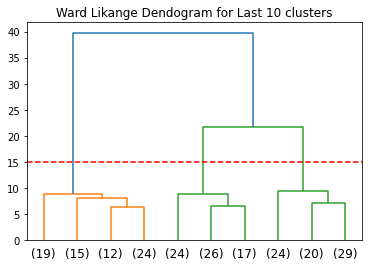

In [25]:
clusters = fcluster(wardlink, 15, criterion='distance')
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )
plt.title('Ward Likange Dendogram for Last 10 clusters')
plt.axhline(y = 15 , color = 'red', linestyle = '--');

In [26]:
data_df['clusters'] = clusters

In [27]:
data_df.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000,2
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308,2
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825,3
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273,1
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2


In [28]:
# Cluster frequency
data_df.clusters.value_counts().sort_index()

1    70
2    67
3    73
Name: clusters, dtype: int64

In [29]:
aggdata = data_df.iloc[:,0:8].groupby('clusters').mean()
aggdata['frequency'] = data_df.clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,frequency
clusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


In [30]:
aggdata.T

clusters,1,2,3
spending,18.371429,11.872388,14.199041
advance_payments,16.145429,13.257015,14.233562
probability_of_full_payment,0.884400,0.848072,0.879190
current_balance,6.158171,5.238940,5.478233
credit_limit,3.684629,2.848537,3.226452
min_payment_amt,3.639157,4.949433,2.612181
max_spent_in_single_shopping,6.017371,5.122209,5.086178
frequency,70.000000,67.000000,73.000000


1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [31]:
k_means = KMeans(n_clusters = 4,random_state=1)

In [32]:
k_means.fit(scaled_df)

KMeans(n_clusters=4, random_state=1)

In [33]:
k_means.labels_

array([1, 0, 1, 3, 1, 3, 3, 0, 1, 3, 1, 0, 3, 1, 0, 3, 0, 3, 0, 3, 3, 3,
       1, 3, 0, 2, 0, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 1, 1, 0, 2, 1,
       3, 3, 0, 1, 1, 1, 3, 1, 1, 1, 1, 2, 3, 3, 3, 1, 0, 3, 3, 2, 0, 1,
       1, 0, 1, 0, 0, 3, 1, 1, 3, 1, 0, 3, 2, 0, 0, 0, 0, 1, 3, 2, 2, 2,
       2, 3, 0, 1, 0, 3, 0, 1, 1, 2, 3, 2, 0, 1, 2, 1, 0, 1, 1, 3, 0, 1,
       2, 0, 1, 3, 3, 2, 0, 0, 3, 1, 0, 3, 3, 3, 0, 0, 1, 3, 0, 0, 3, 0,
       0, 1, 3, 1, 1, 3, 2, 0, 2, 0, 3, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 2,
       0, 0, 0, 3, 0, 2, 1, 3, 1, 2, 1, 3, 2, 0, 0, 3, 0, 3, 0, 1, 1, 1,
       0, 0, 2, 3, 0, 0, 0, 0, 2, 2, 0, 2, 0, 3, 0, 0, 3, 1, 0, 2, 1, 3,
       1, 3, 0, 2, 0, 3, 2, 0, 2, 0, 2, 2])

In [34]:
k_means.inertia_

371.301721277542

In [35]:
# Forming clusters with K = 1,3,4,5,6 and comparing the WSS
k_means1 = KMeans(n_clusters = 1)
k_means1.fit(scaled_df)
k_means1.inertia_

1469.9999999999995

In [36]:
k_means3 = KMeans(n_clusters = 3)
k_means3.fit(scaled_df)
k_means3.inertia_

430.65897315130064

In [37]:
k_means4 = KMeans(n_clusters = 4)
k_means4.fit(scaled_df)
k_means4.inertia_

371.301721277542

In [38]:
k_means5 = KMeans(n_clusters = 5)
k_means5.fit(scaled_df)
k_means5.inertia_

327.18981108824903

In [39]:
k_means6 = KMeans(n_clusters = 6)
k_means6.fit(scaled_df)
k_means6.inertia_

289.3242006671915

In [40]:
wss = []
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)
wss

[1469.9999999999995,
 659.1717544870411,
 430.65897315130064,
 371.6531439995162,
 328.1802471421733,
 293.77978943468025,
 263.0980107759758,
 239.8687748706713,
 221.46422740329737,
 205.53387104679737]

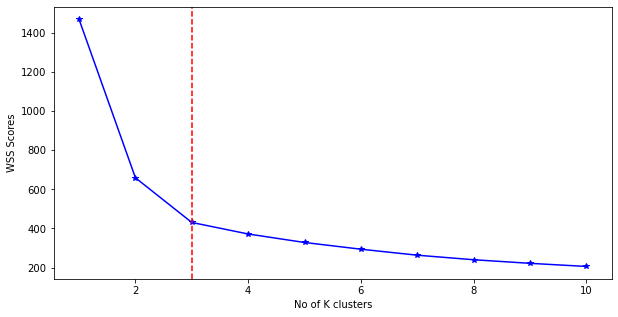

In [41]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11), wss, marker='*', color='b');
plt.axvline(x = 3 , linestyle = '--', color = 'red')
plt.xlabel('No of K clusters')
plt.ylabel('WSS Scores')
plt.show();

Silhouette score is the best for 3 clusters hence we will go with 3 cluster profiling for this dataset

In [42]:
labels = k_means3.labels_
silhouette_score(scaled_df,labels)

0.40072705527512986

In [43]:
sil_width = []
for i in range(2,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    labels = KM.labels_
    sil = silhouette_score(scaled_df,labels)
    print( i, sil)
    sil_width.append(sil)

2 0.46577247686580914
3 0.40072705527512986
4 0.3291966792017613
5 0.2831027965693671
6 0.2801892118573284
7 0.28063627031589905
8 0.2612348864141488
9 0.2534710623774899
10 0.2553432326414086


In [44]:
sil_width_s = silhouette_samples(scaled_df,labels)

In [45]:
data_df["sil_width"] = sil_width_s
data_df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0.437581
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0.291259
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,-0.019700
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0.473783
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0.471440


1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [46]:
aggdata.T

clusters,1,2,3
spending,18.371429,11.872388,14.199041
advance_payments,16.145429,13.257015,14.233562
probability_of_full_payment,0.884400,0.848072,0.879190
current_balance,6.158171,5.238940,5.478233
credit_limit,3.684629,2.848537,3.226452
min_payment_amt,3.639157,4.949433,2.612181
max_spent_in_single_shopping,6.017371,5.122209,5.086178
frequency,70.000000,67.000000,73.000000


In [47]:
df_kmeans = scaled_df
df_kmeans['k_clusters'] = k_means3.labels_
df_kmeans.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,k_clusters
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998,2
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582,0
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107,2
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961,1
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813,2


In [48]:
# Cluster frequency
df_kmeans['k_clusters'].value_counts().sort_index()

0    71
1    72
2    67
Name: k_clusters, dtype: int64

In [49]:
aggdata_kmeans = df_kmeans.iloc[:,0:8].groupby('k_clusters').mean()
aggdata_kmeans['frequency'] = df_kmeans.k_clusters.value_counts().sort_index()
aggdata_kmeans

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,frequency
k_clusters,,,,,,,,
0,-0.141119,-0.170043,0.449606,-0.257814,0.001647,-0.661919,-0.585893,71
1,-1.030253,-1.006649,-0.964905,-0.897685,-1.085583,0.694804,-0.624809,72
2,1.256682,1.261966,0.560464,1.237883,1.164852,-0.045219,1.292308,67


# Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [50]:
df = pd.read_csv(r'C:\Users\ACER\Downloads\DSBA\Data Mining\Project\insurance_part2_data.csv')
df.head(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
5,45,JZI,Airlines,Yes,15.75,Online,8,45.00,Bronze Plan,ASIA
6,61,CWT,Travel Agency,No,35.64,Online,30,59.40,Customised Plan,Americas
7,36,EPX,Travel Agency,No,0.00,Online,16,80.00,Cancellation Plan,ASIA
8,36,EPX,Travel Agency,No,0.00,Online,19,14.00,Cancellation Plan,ASIA
9,36,EPX,Travel Agency,No,0.00,Online,42,43.00,Cancellation Plan,ASIA


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [52]:
df.shape

(3000, 10)

In [53]:
df.dtypes

Age               int64
Agency_Code      object
Type             object
Claimed          object
Commision       float64
Channel          object
Duration          int64
Sales           float64
Product Name     object
Destination      object
dtype: object

In [54]:
df.isna().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [55]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [56]:
df.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [58]:
df.duplicated().sum()

139

In [59]:
df[df.duplicated()]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [60]:
df.drop_duplicates(inplace=True)

In [61]:
df["Duration"] = df["Duration"].replace(-1,0)

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2861.0,38.204124,10.678106,8.0,31.0,36.00,43.00,84.00
Commision,2861.0,15.080996,25.826834,0.0,0.0,5.63,17.82,210.21
Duration,2861.0,72.120587,135.977013,0.0,12.0,28.00,66.00,4580.00
Sales,2861.0,61.757878,71.399740,0.0,20.0,33.50,69.30,539.00


In [63]:
df_continious = df.select_dtypes(["float64","int64"])
df_continious.head()

,Age,Commision,Duration,Sales
0,48,0.70,7,2.51
1,36,0.00,34,20.00
2,39,5.94,3,9.90
3,36,0.00,4,26.00
4,33,6.30,53,18.00


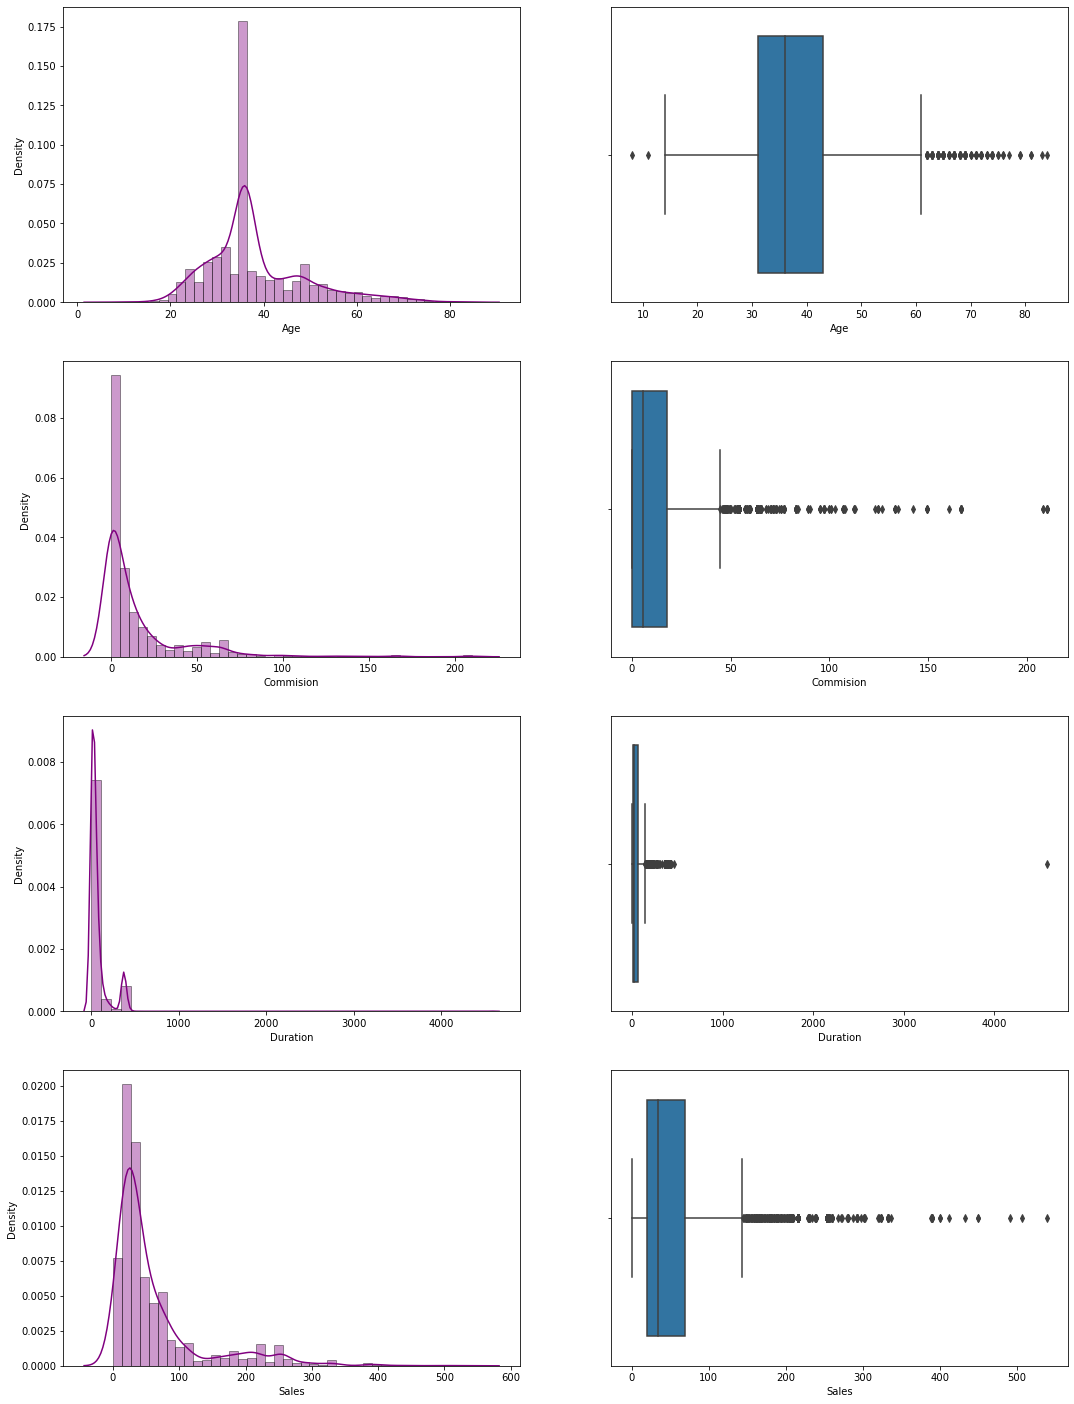

In [64]:
fig, axs = plt.subplots(nrows = 4, ncols = 2, figsize = (18,25))
sns.distplot(df_continious['Age'], bins = 40, hist_kws= dict(ec = 'black'), ax= axs[0][0], color= 'purple');
sns.distplot(df_continious['Commision'], bins = 40, hist_kws= dict(ec = 'black'), ax =axs[1][0], color= 'purple');
sns.distplot(df_continious['Duration'], bins = 40, hist_kws= dict(ec = 'black'), ax= axs[2][0], color = 'purple');
sns.distplot(df_continious['Sales'], bins = 40, hist_kws= dict(ec ='black'), ax = axs[3][0], color= 'purple');

sns.boxplot(df_continious['Age'], ax = axs[0][1]);
sns.boxplot(df_continious['Commision'], ax = axs[1][1]);
sns.boxplot(df_continious['Duration'], ax = axs[2][1]);
sns.boxplot(df_continious['Sales'], ax = axs[3][1]);

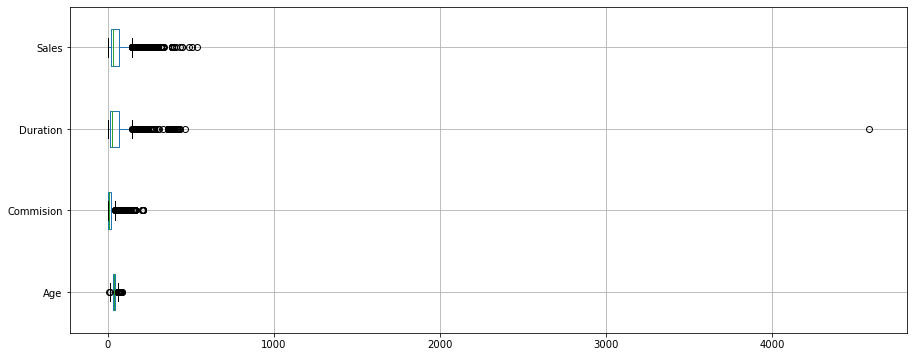

In [65]:
df_continious.boxplot(figsize=(15,6), vert = 0);

In [66]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = np.percentile(col,[25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [67]:
# l1,u1=remove_outlier(df_continious['Age'])
# df_continious['Age']=np.where(df_continious['Age']>u1,u1,df_continious['Age'])
# df_continious['Age']=np.where(df_continious['Age']<l1,l1,df_continious['Age'])

# l2,u2=remove_outlier(df_continious['Commision'])
# df_continious['Commision']=np.where(df_continious['Commision']>u2,u2,df_continious['Commision'])
# df_continious['Commision']=np.where(df_continious['Commision']<l2,l2,df_continious['Commision'])

# l4,u4=remove_outlier(df_continious['Duration'])
# df_continious['Duration']=np.where(df_continious['Duration']>u4,u4,df_continious['Duration'])
# df_continious['Duration']=np.where(df_continious['Duration']<l4,l4,df_continious['Duration'])

# l5,u5=remove_outlier(df_continious['Sales'])
# df_continious['Sales']=np.where(df_continious['Sales']>u5,u5,df_continious['Sales'])
# df_continious['Sales']=np.where(df_continious['Sales']<l5,l5,df_continious['Sales'])

In [68]:
# df_continious.boxplot(figsize=(15,6), vert = 0);

In [69]:
for columns in df_continious.columns:
    print('Skewness of {} is'.format(columns), round(df_continious[columns].skew(),2))

Skewness of Age is 1.1
Skewness of Commision is 3.1
Skewness of Duration is 13.79
Skewness of Sales is 2.34


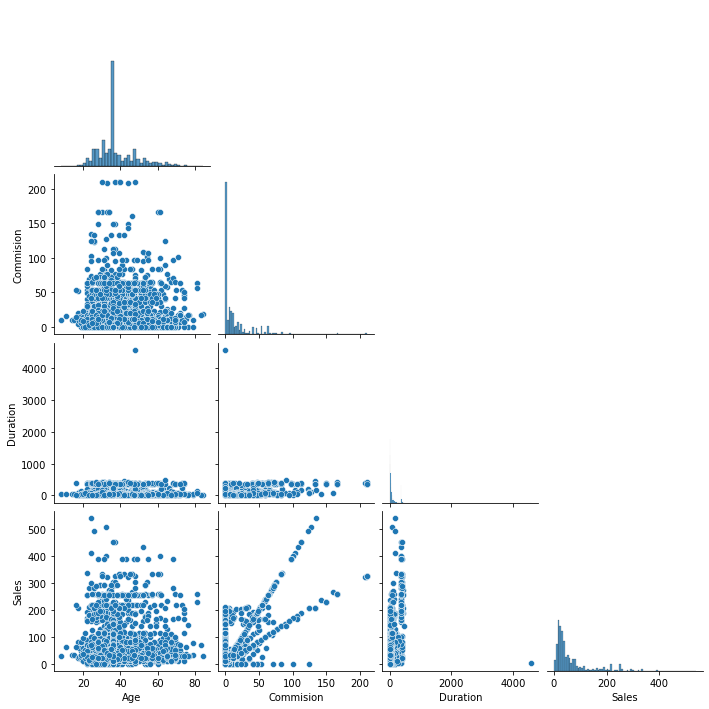

In [70]:
sns.pairplot(df_continious, corner=True);

In [71]:
corrm = df_continious.corr()
corrm

,Age,Commision,Duration,Sales
Age,1.000000,0.064759,0.027454,0.036187
Commision,0.064759,1.000000,0.462113,0.762181
Duration,0.027454,0.462113,1.000000,0.549888
Sales,0.036187,0.762181,0.549888,1.000000


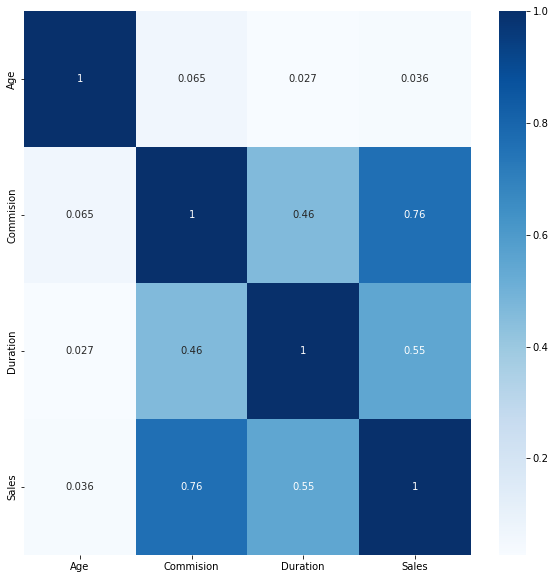

In [72]:
plt.figure(figsize=(10,10))
sns.heatmap(corrm, annot=True, cmap='Blues');
plt.show();

2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

&

2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

In [73]:
for feature in df.columns: 
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature]).codes 

In [74]:
df.head(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0
5,45,3,0,1,15.75,1,8,45.00,0,0
6,61,1,1,0,35.64,1,30,59.40,2,1
7,36,2,1,0,0.00,1,16,80.00,1,0
8,36,2,1,0,0.00,1,19,14.00,1,0
9,36,2,1,0,0.00,1,42,43.00,1,0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 193.1 KB


Train Test Split

In [76]:
x = df.drop("Claimed", axis=1)
y = df.pop("Claimed")

In [77]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [115]:
print('x_train: ',x_train.shape)
print('x_test: ',x_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

x_train:  (2002, 9)
x_test:  (859, 9)
y_train:  (2002,)
y_test:  (859,)


CART

In [78]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [79]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [80]:
train_char_label = ['No', 'Yes']
df_insure_file = open('df_insure_file.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=df_insure_file, feature_names = list(x_train), class_names = list(train_char_label))

df_insure_file.close()
dot_data

In [81]:
param_grid = {
    'max_depth': [10,12,13],
    'min_samples_leaf': [60,90,120],
    'min_samples_split': [150,180,250]
}

dt_model = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)

In [82]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 12, 13],
                         'min_samples_leaf': [60, 90, 120],
                         'min_samples_split': [150, 180, 250]})

In [83]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 90, 'min_samples_split': 150}

In [84]:
best_grid = grid_search.best_estimator_

In [85]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

AUC: 0.810


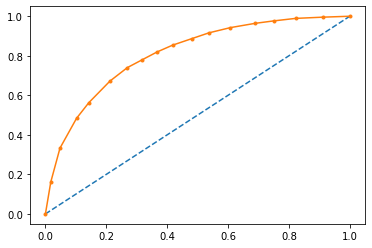

In [86]:
# predict probabilities
probs = best_grid.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.797


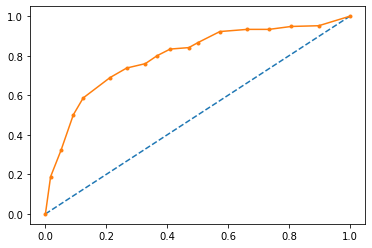

In [87]:
# predict probabilities
probs = best_grid.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [88]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1359
           1       0.69      0.48      0.57       643

    accuracy                           0.76      2002
   macro avg       0.74      0.69      0.70      2002
weighted avg       0.76      0.76      0.75      2002



In [89]:
confusion_matrix(y_train,ytrain_predict)

array([[1220,  139],
       [ 332,  311]], dtype=int64)

In [90]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       588
           1       0.72      0.50      0.59       271

    accuracy                           0.78       859
   macro avg       0.76      0.71      0.72       859
weighted avg       0.77      0.78      0.77       859



In [91]:
confusion_matrix(y_test,ytest_predict)

array([[534,  54],
       [135, 136]], dtype=int64)

Random forest classifier

In [92]:
param_grid = {
    'max_depth': [10, 11],
    'min_samples_leaf': [60, 90],
    'min_samples_split': [120, 150],
    'n_estimators': [101, 301]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [93]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 11], 'min_samples_leaf': [60, 90],
                         'min_samples_split': [120, 150],
                         'n_estimators': [101, 301]})

In [94]:
grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 60,
 'min_samples_split': 150,
 'n_estimators': 101}

In [95]:
best_grid = grid_search.best_estimator_

In [96]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

AUC: 0.812


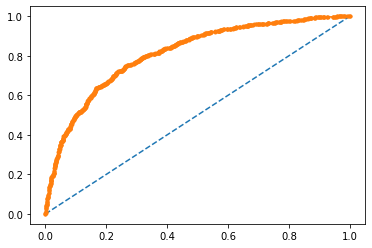

In [97]:
# predict probabilities
probs = best_grid.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.818


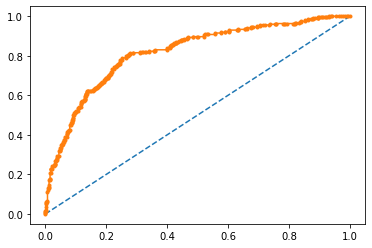

In [98]:
# predict probabilities
probs = best_grid.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [99]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84      1359
           1       0.69      0.51      0.59       643

    accuracy                           0.77      2002
   macro avg       0.74      0.70      0.71      2002
weighted avg       0.76      0.77      0.76      2002



In [100]:
confusion_matrix(y_train,ytrain_predict)

array([[1214,  145],
       [ 317,  326]], dtype=int64)

In [101]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       588
           1       0.71      0.50      0.59       271

    accuracy                           0.78       859
   macro avg       0.75      0.70      0.72       859
weighted avg       0.77      0.78      0.77       859



In [102]:
confusion_matrix(y_test,ytest_predict)

array([[532,  56],
       [135, 136]], dtype=int64)

ANN

In [103]:
sc = StandardScaler() 
x_train = sc.fit_transform(x_train) 
x_test = sc.transform(x_test)

In [104]:
param_grid = {
    'hidden_layer_sizes': [(100,100,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1,0.01,0.001],
    'max_iter' : [5000]
}

rfcl = MLPClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [105]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(100, 100, 100)],
                         'max_iter': [5000], 'solver': ['sgd', 'adam'],
                         'tol': [0.1, 0.01, 0.001]})

In [106]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100, 100, 100),
 'max_iter': 5000,
 'solver': 'adam',
 'tol': 0.01}

In [107]:
best_grid = grid_search.best_estimator_

In [108]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

AUC: 0.805


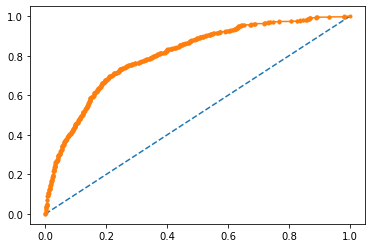

In [109]:
# predict probabilities
probs = best_grid.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.803


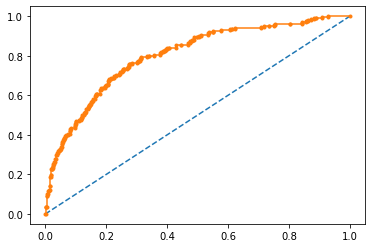

In [110]:
# predict probabilities
probs = best_grid.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [111]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      1359
           1       0.67      0.49      0.56       643

    accuracy                           0.76      2002
   macro avg       0.73      0.69      0.70      2002
weighted avg       0.75      0.76      0.75      2002



In [112]:
confusion_matrix(y_train,ytrain_predict)

array([[1202,  157],
       [ 329,  314]], dtype=int64)

In [113]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       588
           1       0.64      0.51      0.57       271

    accuracy                           0.76       859
   macro avg       0.72      0.69      0.70       859
weighted avg       0.75      0.76      0.75       859



In [114]:
confusion_matrix(y_test,ytest_predict)

array([[511,  77],
       [132, 139]], dtype=int64)